# Main Imports and Functions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file1 = "ex2data1.txt"
file2 = "ex2data2.txt"

In [2]:
def hypothesis(x):
    return 1.0/(1+np.exp(-x))

In [3]:
def costFunction(theta, X, y):
    m = y.size
    h = hypothesis(X @ theta)
    if(h[0] == 0):
        h[0] = 0.000001
    
    if(h[0] == 1):
        h[0] = 0.999999 
    c1 = y.T @ np.log(h)
    c2 = (1-y).T @ (np.log(1 - h))

    return -(c1 + c2)/m


In [4]:
def regularizedCostFunction(theta, X, y, regularization_factor):
    m = y.size
    h = hypothesis(X.dot(theta))
    res = 0.0
    if(h[0] == 0):
        h[0] = 0.000001
    
    if(h[0] == 1):
        h[0] = 0.999999

    c1 = y.T @ (np.log(h))
    c2 = (1-y).T @ (np.log(1 - h))
    rf = (regularization_factor/(2*m)) * np.sum(np.power(theta[1:], 2))
    
    res = (-(c1 + c2)/m) + rf
        
    return res


In [5]:
def gradientDecent(theta, X, y, learning_rate, iterations):
    m = y.size
    cost_history = []
    
    i = 0
    while (i < iterations):
        prediction = hypothesis(X @ theta)

        cost = costFunction(theta, X, y)
        cost_history.append(cost[0])

        derivative_cost = (1/m) * X.T @ (prediction - y)
        theta = theta - learning_rate * derivative_cost
        
        i += 1

    return theta, cost_history

In [6]:
def regularizedGradientDecent(theta, X, y, learning_rate, iterations, regularization_factor):
    m = y.size
    cost_history = []
    
    i = 0
    while (i < iterations):
        prediction = hypothesis(X @ theta)

        cost = regularizedCostFunction(theta, X, y, regularization_factor)
        cost_history.append(cost[0])

        derivative_cost = (1/m) * X.T @ (prediction - y)
        theta = theta - (learning_rate * derivative_cost) + np.sum((regularization_factor/m) * np.r_[ [[0]], theta[1:]])
        
        i += 1

    return theta, cost_history

In [7]:
def map_features(x, y):
    rows = x.size
    degree = 6

    res = np.c_[np.ones(rows), x, y, x*y]

    for i in range(2, 7):
        x1_pow = np.power(x, i)
        x2_pow = np.power(y, i)
        # for j in range(i):
        #     x1x2 = x1_pow * np.power(y, j)
        #     res = np.c_[res, x1x2]

        x1x2 = x1_pow * x2_pow

        res = np.c_[res, x1_pow, x2_pow, x1x2]

    return res

# Logistic Regression

## Data Visualize

In [8]:
# Loading data

df1 = pd.read_csv(file1, header= None)
df1.columns = ["Exam1", "Exam2", "Status"]
df1.head()

,Exam1,Exam2,Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


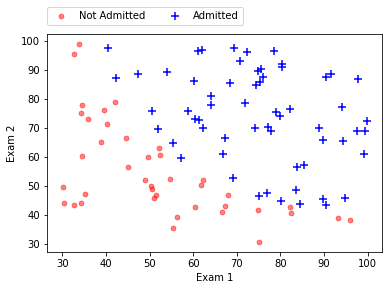

In [9]:
# Ploatting Data

# Rows with y = 0
_mapped_x = df1.loc[df1["Status"] == 0]
plt.scatter(_mapped_x["Exam1"], _mapped_x["Exam2"],s = 25, c='red', marker='o', linewidths= .75, alpha= .5)

# Rows with y = 1
_mapped_x = df1.loc[df1["Status"] == 1]
plt.scatter(_mapped_x["Exam1"], _mapped_x["Exam2"],s = 50, c='blue', marker='+', linewidths= .75)

plt.xlabel("Exam 1")
plt.ylabel("Exam 2")

plt.legend(["Not Admitted", "Admitted"], ncol = 2, bbox_to_anchor= (0.6, 1.15))


plt.show()


In [10]:
# Initializing Arrays

Y_arr = np.array(df1)[::, 2::]
Y_arr.shape
print("First 5 Y vals: ")
print(Y_arr[:5:])

col_size = Y_arr.size

X_arr = np.array(df1)[::,:2:]
X_arr = np.c_[np.ones((col_size, 1)), X_arr]
print("\nFirst 5 X vals: ")
print(X_arr[:5:])


init_theta = np.ones((X_arr.shape[1], 1))
print("\nTheta: ")
print(init_theta)

First 5 Y vals: 
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]

First 5 X vals: 
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]

Theta: 
[[0.]
 [0.]
 [0.]]


## Gradient Descent

In [11]:
#Gradient Descent

iterations = 1000000
learning_rate = 0.001 

theta, cost_history = gradientDecent(init_theta, X_arr, Y_arr, learning_rate, iterations)

print("Thetas:")
print(theta)

print("\nFinal Cost:")
print(cost_history[-1][0])




Thetas:
[[-15.39517866]
 [  0.12825989]
 [  0.12247929]]

Final Cost:
0.2246541908824744


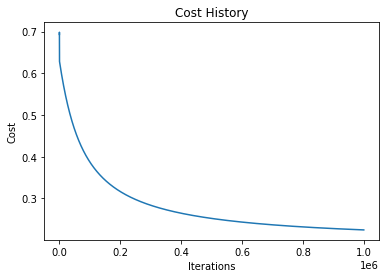


Final Cost:
[0.22465419]


In [12]:
# Plotting cost history

plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

print("\nFinal Cost:")
print(cost_history[-1])

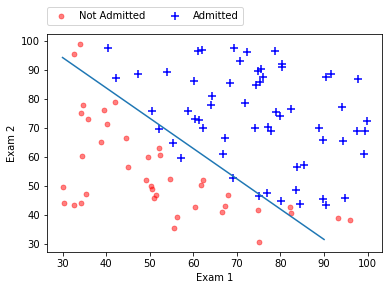

In [13]:
# Ploatting Data

# Rows with y = 0
_mapped_x = df1.loc[df1["Status"] == 0]
plt.scatter(_mapped_x["Exam1"], _mapped_x["Exam2"],s = 25, c='red', marker='o', linewidths= .75, alpha= .5)

# Rows with y = 1
_mapped_x = df1.loc[df1["Status"] == 1]
plt.scatter(_mapped_x["Exam1"], _mapped_x["Exam2"],s = 50, c='blue', marker='+', linewidths= .75)

plt.xlabel("Exam 1")
plt.ylabel("Exam 2")

plt.legend(["Not Admitted", "Admitted"], ncol = 2, bbox_to_anchor= (0.6, 1.15))

x_test = np.array([90, 30])
# 0 = theta[0] + x1*theta[1] + x2*theta[2]
y = -(1.0/theta[2]) * (theta[0] + theta[1]*x_test)
plt.plot(x_test, y)

plt.show()

# Regularized Logistic Regression

In [14]:
df2 = pd.read_csv("ex2data2.txt", header= None)
df2.columns = ["Exam1", "Exam2", "Status"]
df2.head()

,Exam1,Exam2,Status
0,0.051267,0.69955,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


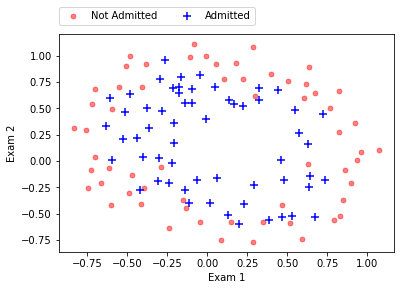

In [15]:
# Ploatting Data

# Rows with y = 0
_mapped_x = df2.loc[df2["Status"] == 0]
plt.scatter(_mapped_x["Exam1"], _mapped_x["Exam2"],s = 25, c='red', marker='o', linewidths= .75, alpha= .5)

# Rows with y = 1
_mapped_x = df2.loc[df2["Status"] == 1]
plt.scatter(_mapped_x["Exam1"], _mapped_x["Exam2"],s = 50, c='blue', marker='+', linewidths= .75)

plt.xlabel("Exam 1")
plt.ylabel("Exam 2")

plt.legend(["Not Admitted", "Admitted"], ncol = 2, bbox_to_anchor= (0.6, 1.15))


plt.show()

In [16]:
# Loading data into arrays

Y_arr = np.array(df2)[:,2]
Y_arr = Y_arr.reshape((Y_arr.size, 1))
print("Y array:")
print(Y_arr[:5])

X_arr = np.array(df2)[:,:2]
X_arr = X_arr.reshape((Y_arr.size, 2))
print("\nX array:")
print(X_arr[:5])

# # Adding ones column to feature matrix

# X_arr = np.c_[np.ones((Y_arr.size, 1)), X_arr]
# print("\nX array with ones column:")
# print(X_arr[:5])



Y array:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]

X array:
[[ 0.051267  0.69955 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]


In [17]:
# Mapping Features
X_arr = map_features(X_arr[:,0], X_arr[:,1])

print("\nX array with feature mapping (first row):")
print(X_arr[:1, :])

print("\nStarting theta vector: ")
theta = np.ones((X_arr.shape[1], 1))
print(theta)


X array with feature mapping (first row):
[[1.00000000e+00 5.12670000e-02 6.99550000e-01 3.58638298e-02
  2.62830529e-03 4.89370203e-01 1.28621429e-03 1.34745327e-04
  3.42338925e-01 4.61285705e-05 6.90798869e-06 2.39483195e-01
  1.65434720e-06 3.54151856e-07 1.67530469e-01 5.93312266e-08
  1.81563032e-08 1.17195940e-01 2.12784502e-09]]

Starting theta vector: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [18]:
iterations = 126000
learning_rate = 0.001
regularization_factor = 0.0001 

new_theta, cost_history = regularizedGradientDecent(theta, X_arr, Y_arr, learning_rate, iterations, regularization_factor)

print("Final cost: ")
print(cost_history[-1][0])

print("\nFinal Theta: ")
print(new_theta.shape)
print(new_theta)

Final cost: 
0.45437434308459673

Final Theta: 
(19, 1)
[[ 1.44033104]
 [ 0.4258004 ]
 [ 1.25506398]
 [-1.08936973]
 [-2.67595392]
 [-1.5267087 ]
 [-0.01008952]
 [ 0.15607006]
 [-0.30000831]
 [ 0.93814813]
 [-1.83739231]
 [-1.47138066]
 [ 0.85920001]
 [-0.13954845]
 [-0.67645157]
 [ 1.0716299 ]
 [-1.16985675]
 [-1.25076025]
 [ 1.05161174]]


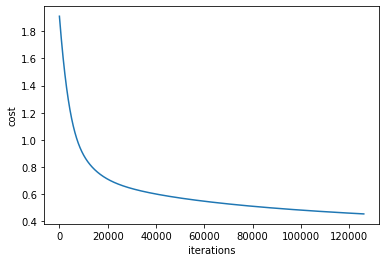

In [19]:
plt.plot(range(iterations), cost_history)
plt.xlabel("iterations")
plt.ylabel("cost")

plt.show()

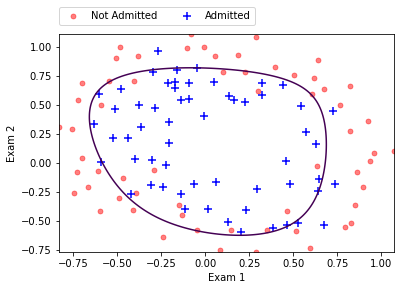

In [27]:
_mapped_x = df2.loc[df2["Status"] == 0]
plt.scatter(_mapped_x["Exam1"], _mapped_x["Exam2"],s = 25, c='red', marker='o', linewidths= .75, alpha= .5)

# Rows with y = 1
_mapped_x = df2.loc[df2["Status"] == 1]
plt.scatter(_mapped_x["Exam1"], _mapped_x["Exam2"],s = 50, c='blue', marker='+', linewidths= .75)

plt.xlabel("Exam 1")
plt.ylabel("Exam 2")

plt.legend(["Not Admitted", "Admitted"], ncol = 2, bbox_to_anchor= (0.6, 1.15))


u = np.linspace(X_arr[:,1].min(), X_arr[:,1].max(), 500)
v = np.linspace(X_arr[:,2].min(), X_arr[:,2].max(), 500)
[U, V] = np.meshgrid(u, v)

z = np.zeros(U.shape)

for i in range(u.size):
    this_x = np.c_[U[:,i], V[:,i]]
    z[:, i] =  (map_features(this_x[:,0], this_x[:,1]) @ new_theta).flatten()
    

plt.contour(u, v, z, [0])

plt.show()